In [1]:


import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from sklearn.datasets import make_blobs

In [2]:
#Многомерные данные
x, y = make_blobs(n_samples=1000 ,centers=10 , n_features= 7, random_state=42)
# Проблема в том что мы не может визуализировать 7 мерное пространство

In [3]:
from sklearn.datasets import load_digits
data = load_digits()
#print(data)

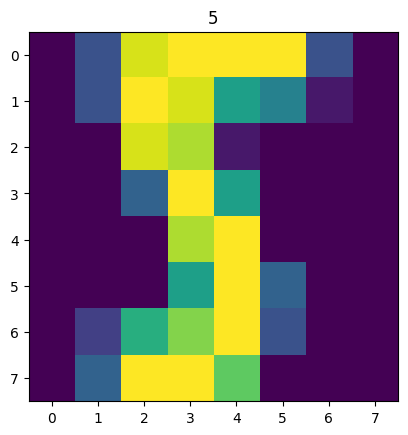

In [4]:
plt.title(str(data.target[145]))
plt.imshow(data.images[145])
plt.show()

In [5]:
print(data.data.shape)

(1797, 64)


In [6]:
from sklearn.mixture import GaussianMixture
bic_opt = 0
i_opt = 0
for i in range(1, 30):
  clf = GaussianMixture(n_components = i)
  clf = clf.fit(data.data)
  bic = clf.bic(data.data)
  if (bic > bic_opt):
    bic_opt = bic
    i_opt = i
    print(i, bic) #Ничо не работает

1 366728.3524624546


In [7]:
#Метод случайных проекций
A = np.random.rand(64)
B = np.random.rand(64)
y0 = data.data@A.T
y1 = data.data@B.T
print(y0.shape, y1.shape)

(1797,) (1797,)


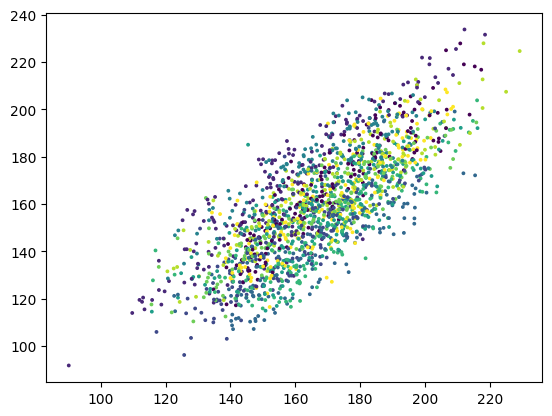

In [8]:
plt.scatter(y0, y1, c = data.target, s = 3)
plt.show()

In [9]:
#Теория представлений:
#1. Линейный
#2. Нелинейный
#3. ...


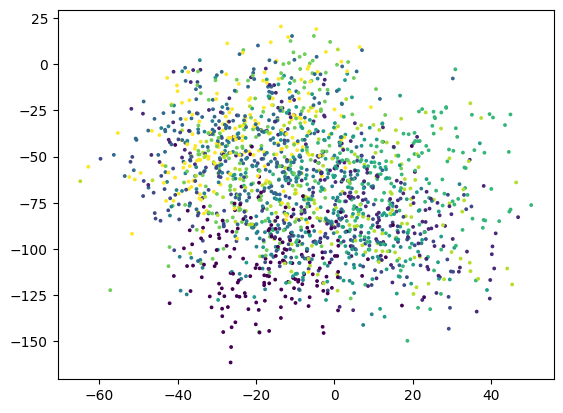

In [10]:
from sklearn.random_projection import GaussianRandomProjection
tr = GaussianRandomProjection(n_components = 2) #Пространтсво в которое переводит, тоже самое что было
y = tr.fit_transform(data.data)
plt.scatter(y[:, 0], y[:,1], c = data.target, s = 3)
plt.show()

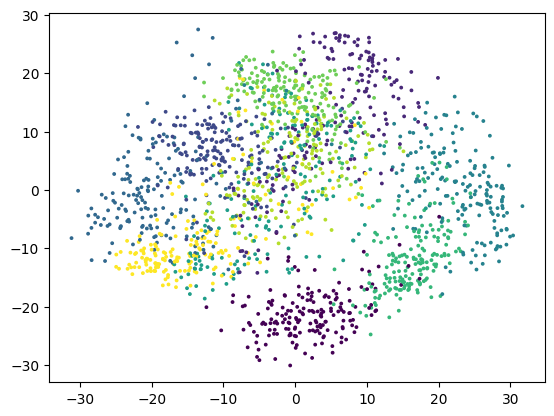

In [11]:
from sklearn.decomposition import PCA
tr = PCA(n_components=2)
y = tr.fit_transform(data.data)
plt.scatter(y[:, 0], y[:,1], c = data.target, s = 3)
plt.show()

In [12]:
#VC
print(np.log(data.data.shape[0])) #Оптимальная размерность

7.493873886783559


d:\Data_science\.venv\Lib\site-packages\sklearn\manifold\_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


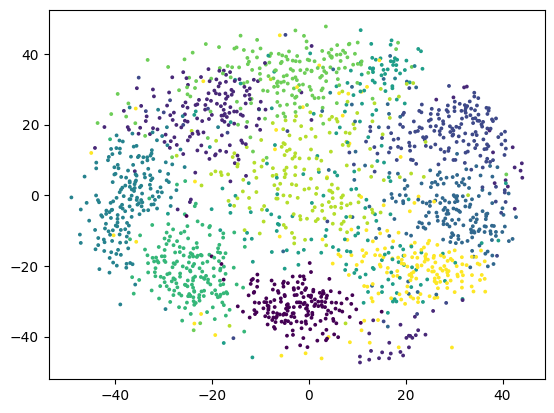

In [13]:
#Метод многомерного шкалирования
from sklearn.manifold import MDS
tr = MDS(n_components=2)
y = tr.fit_transform(data.data)
plt.scatter(y[:, 0], y[:, 1], c = data.target, s = 3)
plt.show()

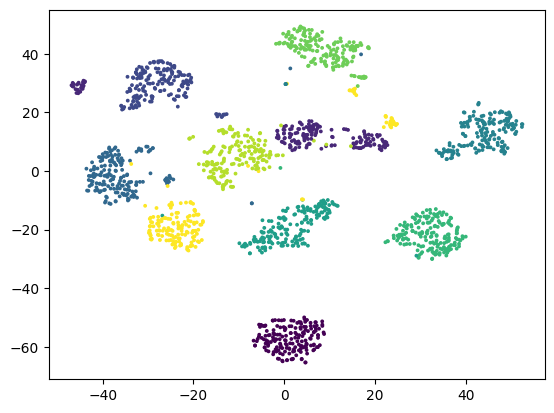

In [14]:
#T-SNE
from sklearn.manifold import TSNE
tr = TSNE(n_components = 2)
y = tr.fit_transform(data.data)
plt.scatter(y[:, 0], y[:, 1], c = data.target, s = 3)
plt.show()


d:\Data_science\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(1797, 2)


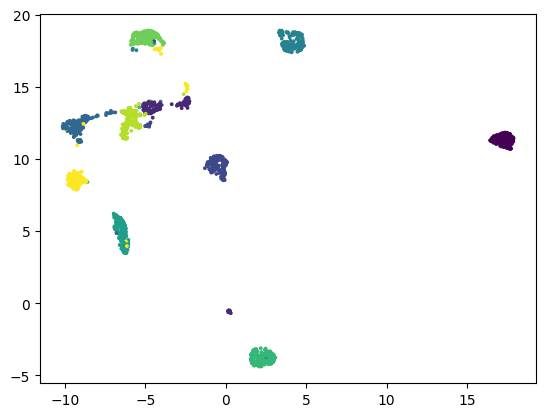

In [15]:
import umap
tr = umap.UMAP(n_components = 2)
y = tr.fit_transform (data.data)
print(y.shape)
plt.scatter(y[:, 0], y[:, 1], c = data.target, s = 3)
plt.show()
